Dataset obtained from:
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download&select=train.csv

We are trying to estimate customer satisfaction from a plane trip

In [22]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

In [3]:
#Read CSV file into dataframe
planes = pd.read_csv('plane.csv')

#Convert satisfaction to numbers
planes = planes.replace('neutral or dissatisfied', 0)
planes = planes.replace('satisfied', 1)

#Convert gender to numbers
planes = planes.replace('Female', 0)
planes = planes.replace('Male', 1)

#Convert customer type to numbers
planes = planes.replace('disloyal Customer', 0)
planes = planes.replace('Loyal Customer', 1)

#Delete duplicated index column
planes = planes.drop('Unnamed: 0', axis=1)

planes.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,1,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,0,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,1,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,1,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,1,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,111157,0,1,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,0
6,82113,1,1,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,0
7,96462,0,1,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,1
8,79485,0,1,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,65725,1,0,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,0


Visualizations

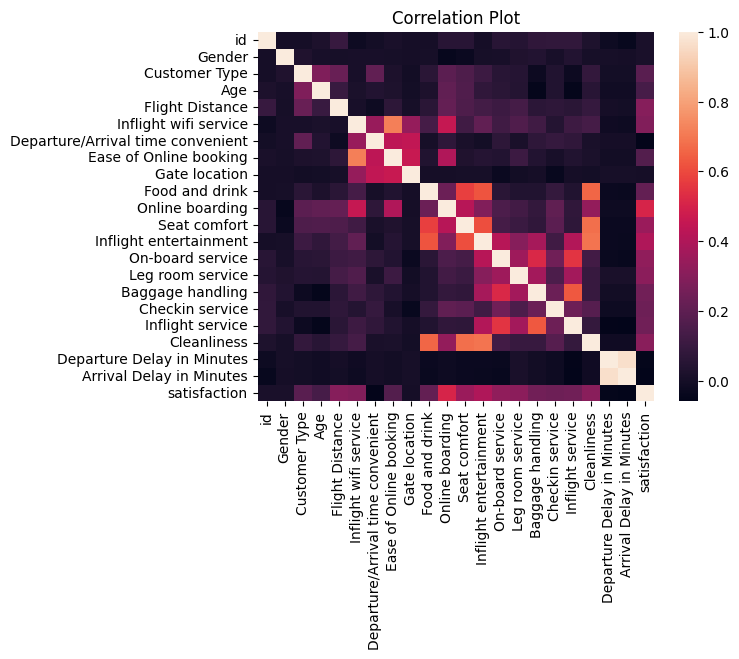

In [4]:
#Correlation Matrix
#Use pandas .corr() return matrix and heatmap as visual
#Use numeric only to avoid errors
sns.heatmap(planes.corr(numeric_only=True))
plt.title('Correlation Plot')
plt.show()

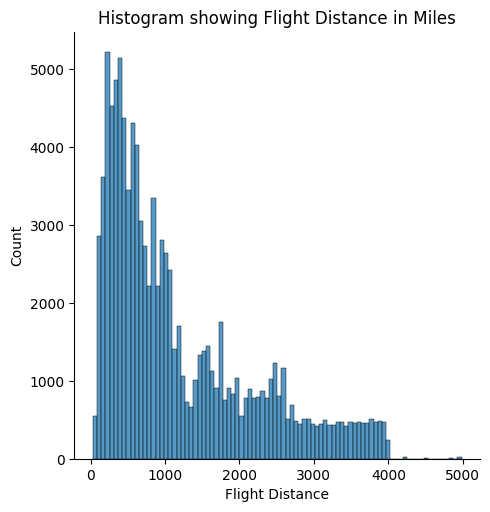

In [5]:
#Distribution Plot
sns.displot(planes['Flight Distance']).set(title='Histogram showing Flight Distance in Miles')
plt.show()

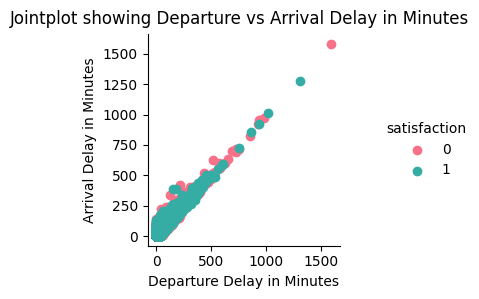

In [6]:
#Jointplot
#Set dataframe, satisfaction as bullets & legend, scatterplot, axes as delay times.
rp=sns.FacetGrid(planes, hue='satisfaction', palette='husl').map(plt.scatter, 'Departure Delay in Minutes', 'Arrival Delay in Minutes').add_legend()
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Jointplot showing Departure vs Arrival Delay in Minutes')
plt.show()

/var/folders/rx/b_8546rj1cs7wfwsr1m9qh440000gn/T/ipykernel_7645/3109873733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= 'satisfaction', y='Age', palette='husl', data=planes)


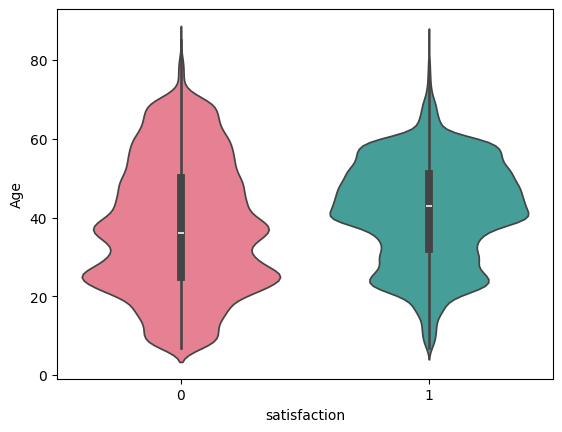

In [7]:
#Violin plot
#Set axes and data frame
sns.violinplot(x= 'satisfaction', y='Age', palette='husl', data=planes)
plt.show()

In [8]:
#Cleaning dataset
planes.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
#Drop NaNs
planes = planes.dropna()
planes.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Training Model

In [10]:
#Code on how to train regression model and finding statistics
#are inspired from class templates.
#Set X values and delete any columns we will not use
X = planes[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Inflight entertainment', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
#Set y values to customer satisfaction
y = planes['satisfaction']

In [11]:
#Splitting dataset in a 70/30 ratio
#Import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=2)

Fitting data

In [12]:
#Creating linear regression model and fitting on the training data
#Import library
from sklearn.linear_model import LinearRegression

#Loading the Linear Regression Model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

Making predictions

In [13]:
#Predictor variable
y_pred = LR.predict(X_test)

In [14]:
#Finding coefficients
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [ 0.0029986   0.00012158  0.09261973 -0.0472387   0.00843972  0.11341427
  0.00065284 -0.00117749]


In [15]:
#Finding the intercept
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -0.3320507678164795


In [16]:
#Finding R Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

R^2: 0.28997938364725384


In [17]:
#Finding the Mean Square Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.1742278325072867


In [18]:
#Finding Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.4174060762702032


In [19]:
#Finding Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 0.3566219606415844


In [20]:
#Export pickle file
import pickle
with open('plane_satisfaction_model.pkl', 'wb') as f:
    pickle.dump(LR, f)

In [32]:
array_ = np.array([34, 1342, 4, 5, 3, 5, 30, 60]).reshape(1,-1)
print(array_)
accuracy_ = LR.predict(array_)
result = accuracy_[0]
print(f'Passenger will be {round(result,2)*100}% satisfied')
[print('') for i in range(4)]

[[  34 1342    4    5    3    5   30   60]]
Passenger will be 61.0% satisfied






/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[None, None, None, None]